In [1]:
from PIL import Image, ImageFilter
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.color import rgb2gray, rgb2yuv, yuv2rgb


def weighted_psnr(ref, img):
    num_channels = ref.shape[2]
    assert num_channels in [1, 3]
    if num_channels == 3:
        ref_yuv = rgb2yuv(ref)
        img_yuv = rgb2yuv(img)

        return (
            4 * psnr(ref_yuv[..., 0], img_yuv[..., 0])
            + psnr(ref_yuv[..., 1], img_yuv[..., 1])
            + psnr(ref_yuv[..., 2], img_yuv[..., 2])
        ) / 6
    else:
        return psnr(ref, img)

In [2]:
from pathlib import Path
import numpy as np
import os
import matplotlib.pyplot as plt

def compare_compressors(image_path):
    reference = Image.open(image_path)
    image_path_without_extension = Path(image_path).stem

    jpeg_compressed_path = image_path_without_extension + ".jpg"
    fractal_compressed_path = image_path_without_extension + "fractal.png"
    fractal_stream_path = image_path_without_extension + ".fract"
    print(f"saving jpeg compressed to {jpeg_compressed_path} and fractal compressed to {fractal_stream_path}")

    jpeg_psnr = []
    jpeg_sizes = []
    fractal_psnr = []
    fractal_sizes = []

    for i in range(0, 70):
        reference.save(jpeg_compressed_path, "JPEG", quality=i)
        jpeg_compressed = Image.open(jpeg_compressed_path)
        jpeg_sizes.append(os.path.getsize(jpeg_compressed_path))
        jpeg_psnr.append(weighted_psnr(np.array(reference), np.array(jpeg_compressed)))

    for size_bytes in range(400, 15400, 500):
        os.system(f"./fcomp {image_path} {size_bytes} {fractal_compressed_path} {fractal_stream_path}")
        fractal_compressed = Image.open(fractal_compressed_path)
        fractal_sizes.append(os.path.getsize(fractal_stream_path))
        fractal_psnr.append(weighted_psnr(np.array(reference), np.array(fractal_compressed)))

    plt.plot(jpeg_sizes, jpeg_psnr, label="jpeg", marker="o")
    plt.plot(fractal_sizes, fractal_psnr, label="fractal", marker="o")
    plt.grid()
    plt.legend()
    plt.xlabel("size")
    plt.ylabel("psnr")
    plt.title(image_path)
    plt.show()


saving jpeg compressed to Lenna256.jpg and fractal compressed to Lenna256.fract
PSNR: 23.1496
PSNR: 25.08
PSNR: 26.6139
PSNR: 27.7105
PSNR: 28.6092
PSNR: 29.3279
PSNR: 29.9224
PSNR: 30.4813
PSNR: 30.9846
PSNR: 31.4191
PSNR: 31.8594
PSNR: 32.2849
PSNR: 32.6783
PSNR: 33.0351
PSNR: 33.4026
PSNR: 33.7564
PSNR: 34.1082
PSNR: 34.4144
PSNR: 34.7045
PSNR: 34.9834
PSNR: 35.2508
PSNR: 35.5417
PSNR: 35.7911
PSNR: 36.0518
PSNR: 36.3041
PSNR: 36.5415
PSNR: 36.8013
PSNR: 37.0387
PSNR: 37.2664
PSNR: 37.4756


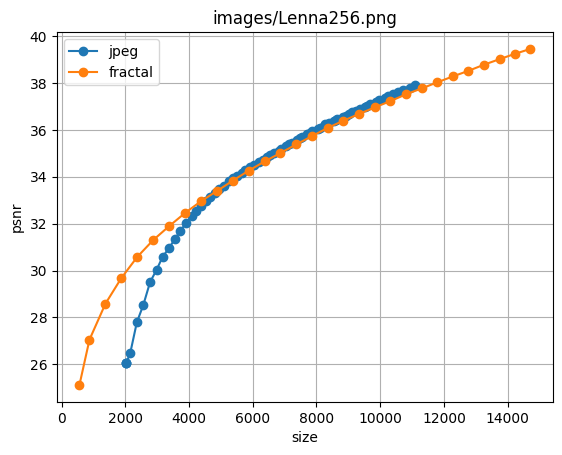

In [3]:
compare_compressors("images/Lenna256.png")

saving jpeg compressed to Baboon256.jpg and fractal compressed to Baboon256.fract
PSNR: 21.3965
PSNR: 22.5404
PSNR: 23.4438
PSNR: 23.9501
PSNR: 24.3198
PSNR: 24.6656
PSNR: 24.9481
PSNR: 25.2159
PSNR: 25.4653
PSNR: 25.6935
PSNR: 25.9093
PSNR: 26.1403
PSNR: 26.3348
PSNR: 26.5362
PSNR: 26.7377
PSNR: 26.9319
PSNR: 27.1371
PSNR: 27.3297
PSNR: 27.5466
PSNR: 27.7556
PSNR: 27.9518
PSNR: 28.1488
PSNR: 28.3262
PSNR: 28.518
PSNR: 28.7071
PSNR: 28.8815
PSNR: 29.0551
PSNR: 29.2191
PSNR: 29.3962
PSNR: 29.5568


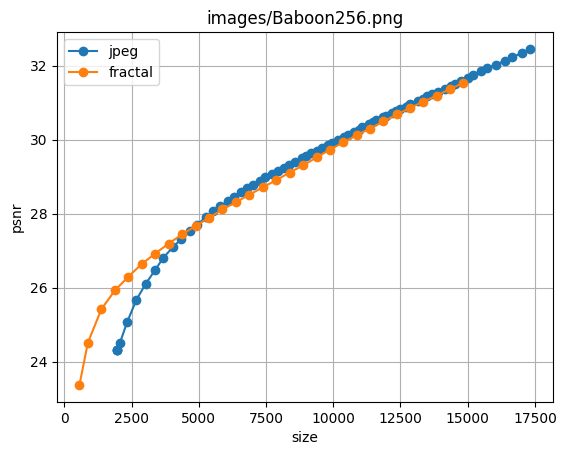

In [4]:
compare_compressors("images/Baboon256.png")

saving jpeg compressed to Lenna512.jpg and fractal compressed to Lenna512.fract
PSNR: 26.2674
PSNR: 26.2674
PSNR: 26.2674
PSNR: 26.2674
PSNR: 26.2674
PSNR: 27.3755
PSNR: 28.1869
PSNR: 28.8
PSNR: 29.2526
PSNR: 29.7031
PSNR: 30.0494
PSNR: 30.3676
PSNR: 30.6353
PSNR: 30.9119
PSNR: 31.1757
PSNR: 31.4298
PSNR: 31.6822
PSNR: 31.9118
PSNR: 32.0991
PSNR: 32.2893
PSNR: 32.4516
PSNR: 32.6094
PSNR: 32.7724
PSNR: 32.9217
PSNR: 33.0703
PSNR: 33.217
PSNR: 33.3567
PSNR: 33.4806
PSNR: 33.6126
PSNR: 33.7356


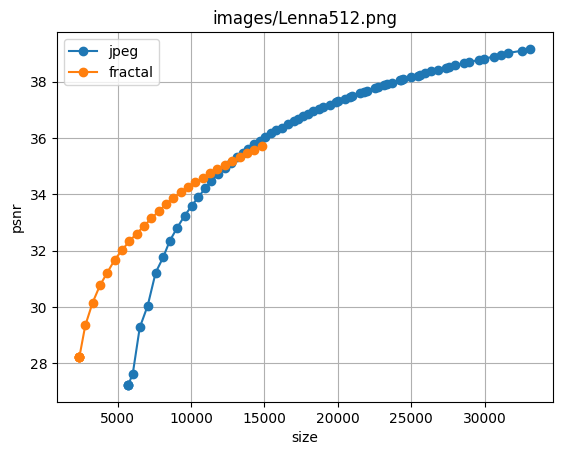

In [5]:
compare_compressors("images/Lenna512.png")